In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [3]:
#loading datatset for three days
sms_call_data_1 = pd.read_csv('sms-call-internet-mi-2013-11-02.csv')
sms_call_data_2 = pd.read_csv('sms-call-internet-mi-2013-11-04.csv')
sms_call_data_3 = pd.read_csv('sms-call-internet-mi-2013-11-06.csv')


# combining the datasets
sms_call_data = pd.concat([sms_call_data_1, sms_call_data_2, sms_call_data_3])


In [4]:
#creating a column for both date and time
sms_call_data[["date", "time"]] = sms_call_data["datetime"].str.split(" ", expand=True)

#droping the original datetime column
sms_call_data = sms_call_data.drop(columns=["datetime"])

In [5]:
#checking the info of the combined dataset
sms_call_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6564031 entries, 0 to 2417155
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   CellID       int64  
 1   countrycode  int64  
 2   smsin        float64
 3   smsout       float64
 4   callin       float64
 5   callout      float64
 6   internet     float64
 7   date         object 
 8   time         object 
dtypes: float64(5), int64(2), object(2)
memory usage: 500.8+ MB


In [6]:
#viewing the first 5 rows of the dataset
sms_call_data.head()

,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time
0,1,0,0.2445,NaN,NaN,NaN,NaN,2013-11-02,00:00:00
1,1,39,1.4952,1.1213,0.2708,0.3004,46.5094,2013-11-02,00:00:00
2,1,53,0.0018,0.0036,NaN,NaN,NaN,2013-11-02,00:00:00
3,2,0,0.2458,NaN,NaN,NaN,NaN,2013-11-02,00:00:00
4,2,39,1.5028,1.1243,0.2751,0.3023,46.6933,2013-11-02,00:00:00


In [7]:
#checking for missing values in all features
sms_call_data.isna().sum()

CellID               0
countrycode          0
smsin          3964171
smsout         5025738
callin         4761685
callout        3764484
internet       3621117
date                 0
time                 0
dtype: int64

In [8]:
# filling the empty values of smsin, smsout, callin, callout, internet with mean of their respective columns

sms_call_data["smsin"] = sms_call_data["smsin"].fillna(np.mean(sms_call_data["smsin"]))

sms_call_data["smsout"] = sms_call_data["smsout"].fillna(np.mean(sms_call_data["smsout"]))

sms_call_data["callin"] = sms_call_data["callin"].fillna(np.mean(sms_call_data["callin"]))

sms_call_data["callout"] = sms_call_data["callout"].fillna(np.mean(sms_call_data["callout"]))

sms_call_data["internet"] = sms_call_data["internet"].fillna(np.mean(sms_call_data["internet"]))

In [9]:
#checking to confirm there are no missing values again
sms_call_data.isna().sum()

CellID         0
countrycode    0
smsin          0
smsout         0
callin         0
callout        0
internet       0
date           0
time           0
dtype: int64

In [10]:
#checking the first 5 rows of the cleaned dataset
sms_call_data.head()

,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time
0,1,0,0.2445,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00
1,1,39,1.4952,1.121300,0.270800,0.300400,46.509400,2013-11-02,00:00:00
2,1,53,0.0018,0.003600,7.738604,5.686694,101.976153,2013-11-02,00:00:00
3,2,0,0.2458,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00
4,2,39,1.5028,1.124300,0.275100,0.302300,46.693300,2013-11-02,00:00:00


In [ ]:
#creating a copy of the dataset to work with. This will be used in a subsequent analysis at the end.
sms_call_data_copy = sms_call_data.copy()

In [12]:
#aggreagating clolumns
sms_call_data["total_sms"] = sms_call_data["smsin"] + sms_call_data["smsout"]
sms_call_data["total_calls"] = sms_call_data["callin"] + sms_call_data["callout"]

sms_call_data = sms_call_data.drop(columns=["smsin", "smsout", "callin", "callout"])

In [13]:
sms_call_data.head()

,CellID,countrycode,internet,date,time,total_sms,total_calls
0,1,0,101.976153,2013-11-02,00:00:00,7.685251,13.425298
1,1,39,46.509400,2013-11-02,00:00:00,2.616500,0.571200
2,1,53,101.976153,2013-11-02,00:00:00,0.005400,13.425298
3,2,0,101.976153,2013-11-02,00:00:00,7.686551,13.425298
4,2,39,46.693300,2013-11-02,00:00:00,2.627100,0.577400


# How many total records across all 3 datasets?

In [14]:
sms_call_data.shape

(6564031, 7)

# How many unique grid squares (CellID) are there?
 



In [15]:
sms_call_data['CellID'].nunique()

10000

In [16]:
#How many unique country codes appear in the data?
sms_call_data['countrycode'].nunique()


302

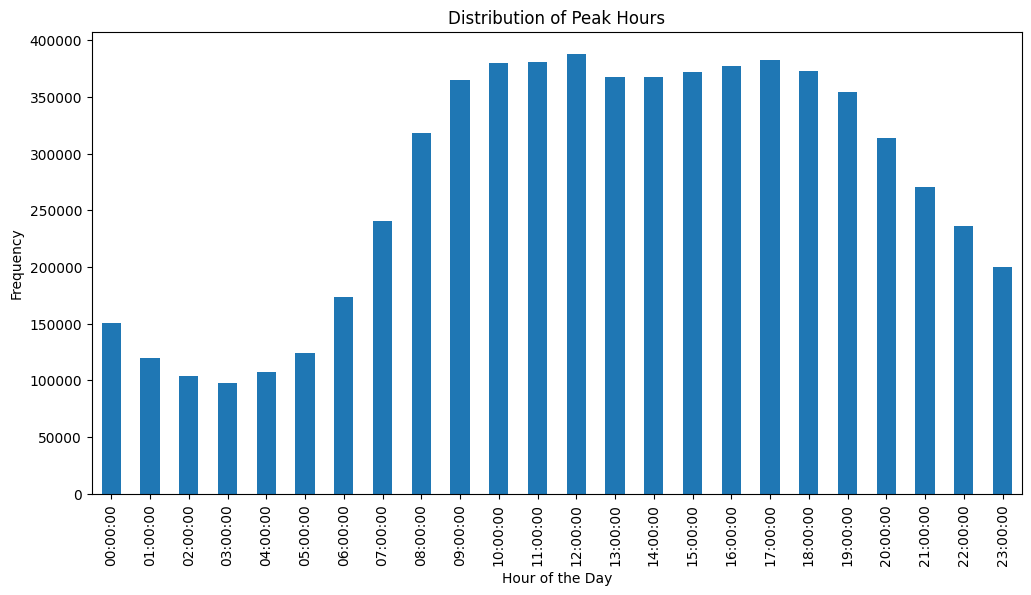

In [17]:
#What is the most common peak hour across all grids? (5)
sms_call_data['time'].value_counts().idxmax()

#ploting thhe peak hours
plt.figure(figsize=(12,6))
sms_call_data['time'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Peak Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.savefig('peak_hours_distribution.png')
plt.show()

In [18]:
# the lowest peak hour across all grids
sms_call_data['time'].value_counts().idxmin()


'03:00:00'

In [19]:
#Calculate and report: mean, median, std, min, max for total calls by hour (15)
#using the groupby to do everything
total_calls_stats = sms_call_data['total_calls'].groupby(sms_call_data['time']).agg(['mean', 'median', 'std', 'min', 'max'])

#using iloc to filter from 00:00:00 to 15:00:00
filtered_stats = total_calls_stats.loc['00:00:00':'15:00:00']


filtered_stats


,mean,median,std,min,max
time,,,,,
00:00:00,10.280157,13.425298,5.279040,0.0002,223.4941
01:00:00,9.928661,13.425298,5.129893,0.0000,141.9847
02:00:00,9.894713,13.425298,5.329786,0.0000,210.9691
03:00:00,9.953373,13.425298,5.649571,0.0000,298.3541
04:00:00,10.235666,13.425298,5.294288,0.0000,255.0555
05:00:00,10.029019,13.425298,5.395003,0.0000,177.1690
06:00:00,10.339697,13.425298,4.969421,0.0002,201.3488
07:00:00,11.464472,13.425298,8.435423,0.0000,412.7314
08:00:00,13.272816,13.425298,22.237365,0.0000,1122.7091


In [20]:


# What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)? (5)
#defining daytime and nighttime
daytime = sms_call_data[(sms_call_data['time'] >= '06:00:00') & (sms_call_data['time'] <= '20:00:00')]
nighttime = sms_call_data[(sms_call_data['time'] < '06:00:00') | (sms_call_data['time'] > '20:00:00')]
#calculating total activity
total_daytime_activity = daytime['total_calls'].sum() + daytime['total_sms'].sum() + daytime['internet'].sum()
total_nighttime_activity = nighttime['total_calls'].sum() + nighttime['total_sms'].sum() + nighttime['internet'].sum()
total_activity = total_daytime_activity + total_nighttime_activity  




In [21]:
total_daytime_percentage = (total_daytime_activity / total_activity) * 100
total_nighttime_percentage = (total_nighttime_activity / total_activity) * 100  
total_daytime_percentage, total_nighttime_percentage

(np.float64(78.5088792175524), np.float64(21.49112078244759))

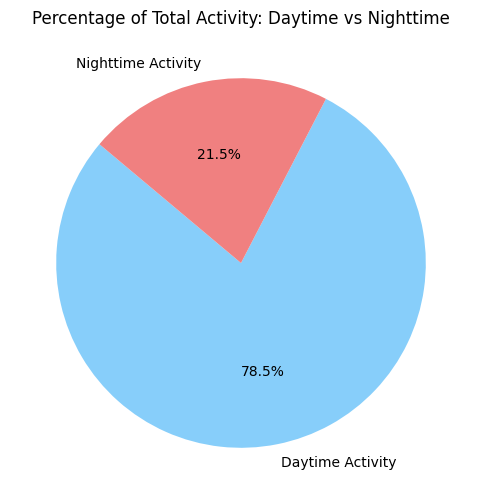

In [22]:
#creaing a line plot to visualize daytime vs nighttime activity
labels = ['Daytime Activity', 'Nighttime Activity'] 
sizes = [total_daytime_percentage, total_nighttime_percentage]
colors = ['lightskyblue', 'lightcoral'] 
plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Activity: Daytime vs Nighttime') 
plt.show()

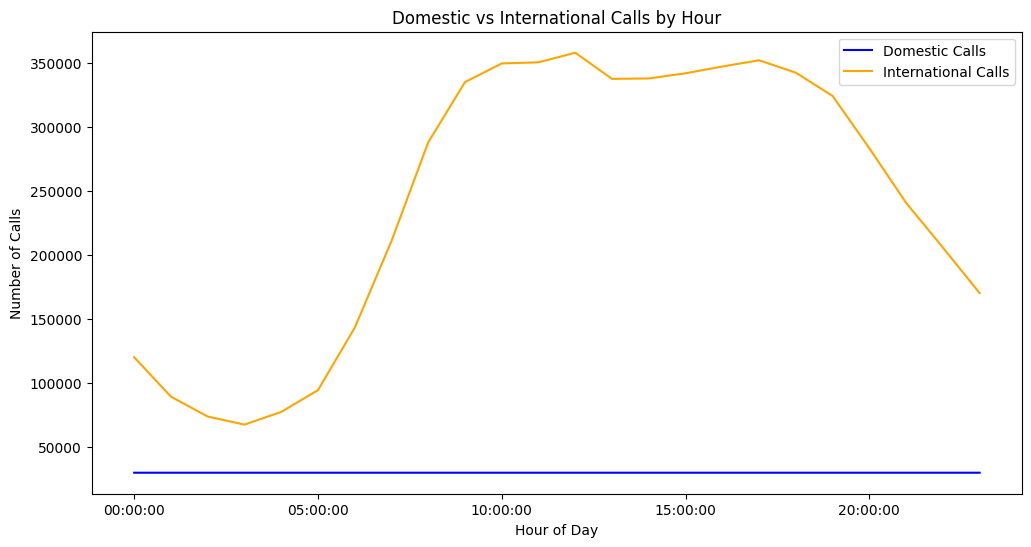

In [23]:
#Domestics (Italy) vs International Calls
Domestic_calls = sms_call_data[sms_call_data['countrycode'] == 39]
international_calls = sms_call_data[sms_call_data['countrycode'] != 39]

#plotting domestic vs international calls by hour
plt.figure(figsize=(12,6))
Domestic_calls['time'].value_counts().sort_index().plot(kind='line', label='Domestic Calls', color='blue')
international_calls['time'].value_counts().sort_index().plot(kind='line', label='International Calls', color='orange')
plt.title('Domestic vs International Calls by Hour')    
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.legend()
plt.show()

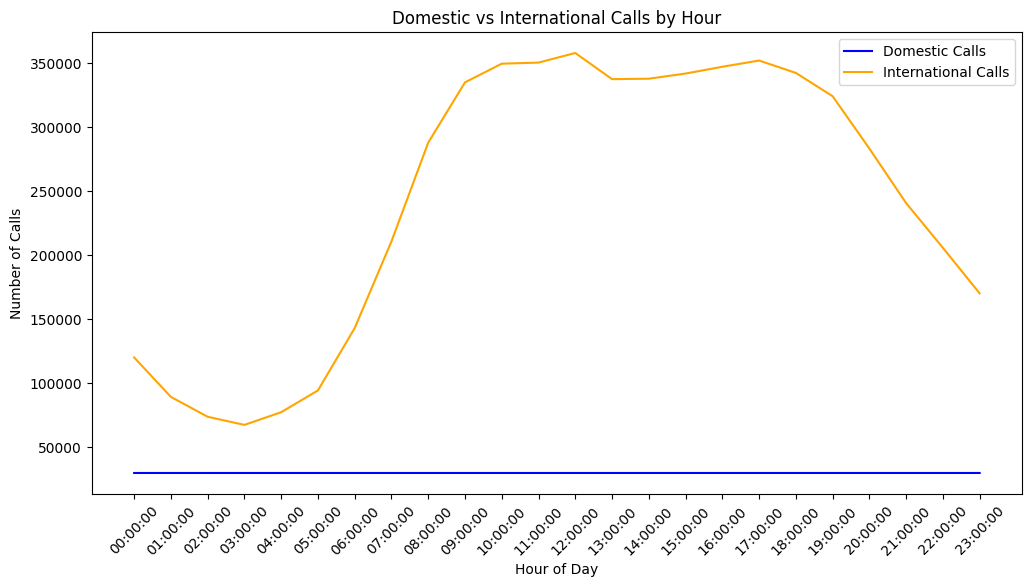

In [24]:
#using a more detailed plot to visualize domestic vs international calls by hour
plt.figure(figsize=(12,6))
hours = sorted(sms_call_data['time'].unique())
domestic_counts = [Domestic_calls[Domestic_calls['time'] == hour].shape[0] for hour in hours]
international_counts = [international_calls[international_calls['time'] == hour].shape[0] for hour in hours]
plt.plot(hours, domestic_counts, label='Domestic Calls', color='blue')  
plt.plot(hours, international_counts, label='International Calls', color='orange')
plt.title('Domestic vs International Calls by Hour')    
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.legend()    
plt.xticks(rotation=45)
plt.show()

In [25]:
import numpy as np

# Convert columns to NumPy arrays
domestic_calls = np.array(Domestic_calls['total_calls'])
international_calls = np.array(international_calls['total_calls'])

# Total calls
total_domestic_calls = np.sum(domestic_calls)
total_international_calls = np.sum(international_calls)

# Combined total
total_calls = total_domestic_calls + total_international_calls

# Percentages
percentage_domestic_calls = (total_domestic_calls / total_calls) * 100
percentage_international_calls = (total_international_calls / total_calls) * 100

# Output
print(f"Percentage of Domestic Calls: {percentage_domestic_calls:.2f}%")
print(f"Percentage of International Calls: {percentage_international_calls:.2f}%")


Percentage of Domestic Calls: 33.11%
Percentage of International Calls: 66.89%


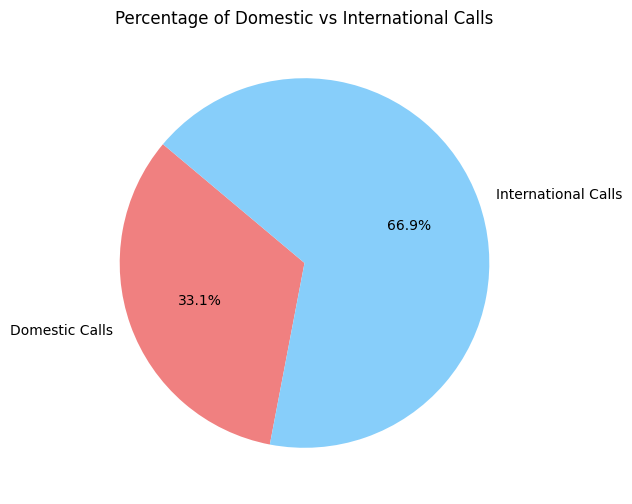

In [26]:
#creating a pie chart to visualize domestic vs international calls
labels = ['Domestic Calls', 'International Calls']
sizes = [percentage_domestic_calls, percentage_international_calls]
colors = ['lightcoral', 'lightskyblue'] 
plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Domestic vs International Calls')
plt.savefig('domestic_vs_international_calls.png')
plt.show()

In [27]:




domestic_sms = sms_call_data[sms_call_data['countrycode'] == 39]
international_sms = sms_call_data[sms_call_data['countrycode'] != 39]

# Convert columns to NumPy arrays
domestic_sms_array = np.array(domestic_sms['total_sms'])
international_sms_array = np.array(international_sms['total_sms'])
# Total SMS
total_domestic_sms = np.sum(domestic_sms_array)
total_international_sms = np.sum(international_sms_array)
# Combined total
total_sms = total_domestic_sms + total_international_sms
# Percentages
percentage_domestic_sms = (total_domestic_sms / total_sms) * 100
percentage_international_sms = (total_international_sms / total_sms) * 100
# Output
print(f"Percentage of Domestic SMS: {percentage_domestic_sms:.2f}%")
print(f"Percentage of International SMS: {percentage_international_sms:.2f}%")

Percentage of Domestic SMS: 24.98%
Percentage of International SMS: 75.02%


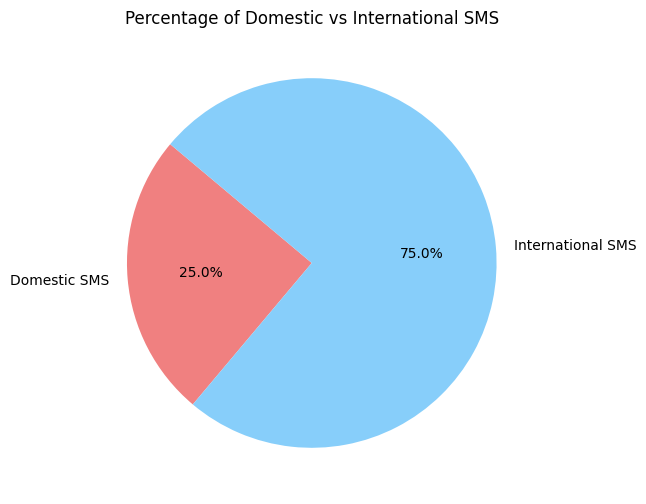

In [28]:
#proviide a pie chart to visualize domestic vs international sms
labels = ['Domestic SMS', 'International SMS']  
sizes = [percentage_domestic_sms, percentage_international_sms]
colors = ['lightcoral', 'lightskyblue']    
plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Domestic vs International SMS') 
plt.savefig('domestic_vs_international_sms.png')
plt.show()

In [29]:
# calulcating the ratio of international outbound to inbound calls

total_inbound_international_calls = np.array(sms_call_data_copy[(sms_call_data_copy["countrycode"] !=39)]["callin"]).sum()



total_outbound_international_calls = np.array(sms_call_data_copy[(sms_call_data_copy["countrycode"] !=39)]["callout"]).sum()


ratio = total_outbound_international_calls / total_inbound_international_calls

print(f"International Call Ratio (Out/In): {ratio:.2f}")

International Call Ratio (Out/In): 0.60


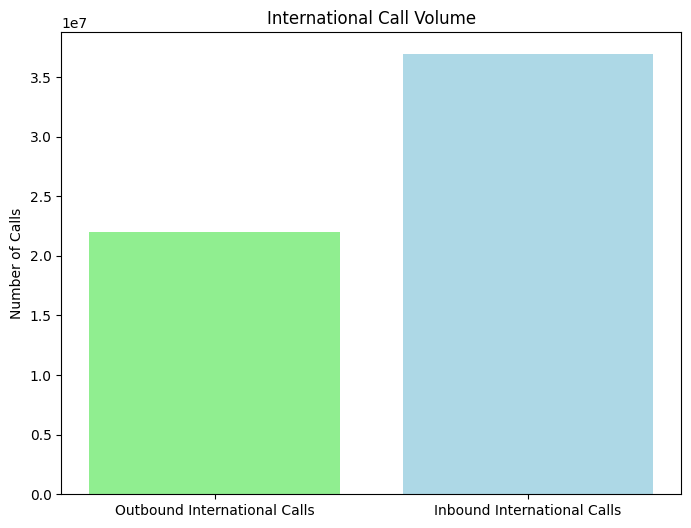

In [30]:
   
#visualizing the international call ratio with a bar chart
labels = ['Outbound International Calls', 'Inbound International Calls']    
sizes = [total_outbound_international_calls, total_inbound_international_calls]
colors = ['lightgreen', 'lightblue']
plt.figure(figsize=(8,6))
plt.bar(labels, sizes, color=colors)        
plt.title('International Call Volume')
plt.ylabel('Number of Calls')
plt.savefig('international_call_volume.png')
plt.show()

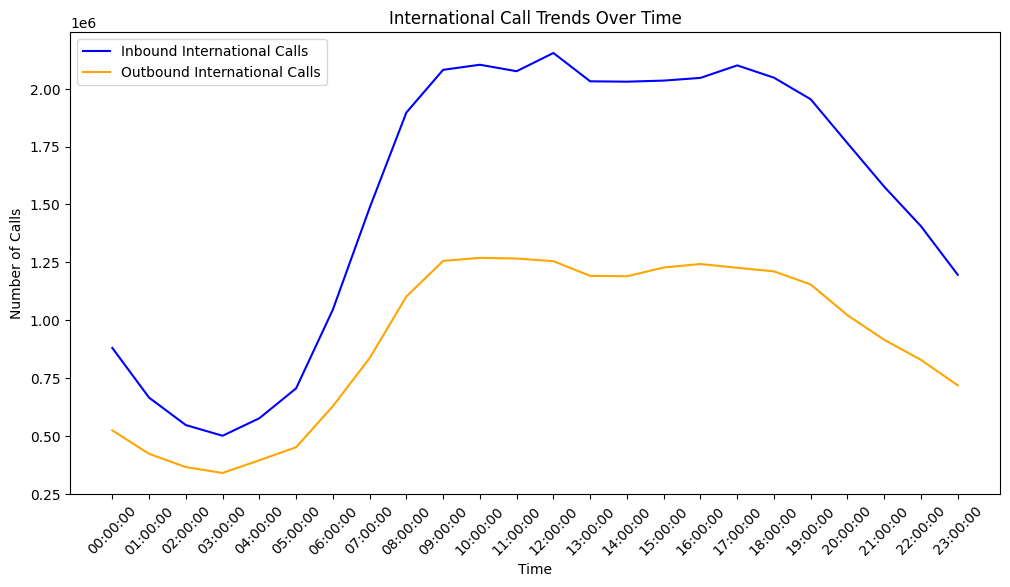

In [31]:
#creating a lineplot to visualize inbound and outbound international calls over time
hours = sorted(sms_call_data_copy['time'].unique())
inbound_counts = [sms_call_data_copy[(sms_call_data_copy['countrycode'] !=39) & (sms_call_data_copy['time'] == hour)]['callin'].sum() for hour in hours]
outbound_counts = [sms_call_data_copy[(sms_call_data_copy['countrycode'] !=39) & (sms_call_data_copy['time'] == hour)]['callout'].sum() for hour in hours]
plt.figure(figsize=(12,6))  
plt.plot(hours, inbound_counts, label='Inbound International Calls', color='blue')
plt.plot(hours, outbound_counts, label='Outbound International Calls', color='orange')
plt.title('International Call Trends Over Time')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Number of Calls')
plt.legend()
plt.show()

In [32]:
# plotting a scatter plot to visualize the correlation between SMS volume and Call volume
import pandas as pd

# 1. Group by CellID to get activity per grid square
grid_activity = sms_call_data.groupby('CellID').agg({
    'total_sms': 'sum',
    'total_calls': 'sum'
}).reset_index()

# 2. Calculate the Pearson Correlation Coefficient
correlation = grid_activity['total_sms'].corr(grid_activity['total_calls'])

print(f"Correlation between SMS and Calls: {correlation:.4f}")

# 3. Interpretation
if correlation > 0.7:
    print("Strong Positive Correlation: High SMS areas are almost always High Call areas.")
elif correlation > 0.3:
    print("Moderate Positive Correlation: There is a trend, but it's not perfect.")
else:
    print("Weak or No Correlation: SMS and Call patterns are independent at the grid level.")

Correlation between SMS and Calls: 0.9862
Strong Positive Correlation: High SMS areas are almost always High Call areas.


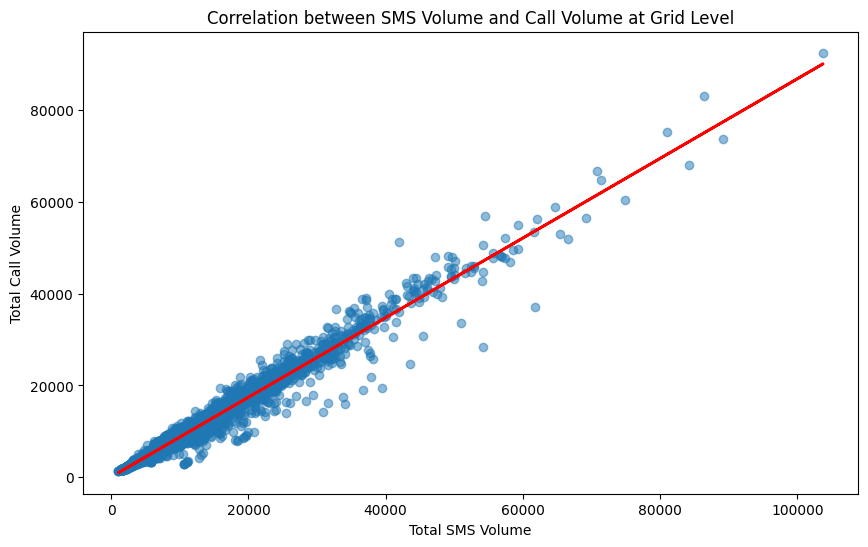

In [33]:
#plotting a scatter plot to visualize the correlation between sms volume and call volume
plt.figure(figsize=(10,6))
plt.scatter(grid_activity['total_sms'], grid_activity['total_calls'], alpha=0.5)
line_fit = np.polyfit(grid_activity['total_sms'], grid_activity['total_calls'], 1)
plt.plot(grid_activity['total_sms'], np.polyval(line_fit, grid_activity['total_sms']), color='red', linewidth=2)
plt.title('Correlation between SMS Volume and Call Volume at Grid Level')
plt.xlabel('Total SMS Volume')
plt.ylabel('Total Call Volume') 
plt.savefig('sms_call_volume_correlation.png')
plt.show()